# Spotify Song Popularity Prediction

This project aims to analyze a dataset from Spotify to predict the popularity of songs based on their audio features. By employing various exploratory data analysis techniques and machine learning models, we'll explore the relationship between song characteristics and their popularity scores.


## Import Necessary Libraries

To start, we'll import Python libraries that are essential for data manipulation, visualization, and machine learning.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


## Load the Dataset

We'll begin our analysis by loading the Spotify dataset, which includes various audio features and popularity scores of songs.


In [5]:
df = pd.read_csv('/content/SpotifyFeatures.csv')

## Initial Data Exploration

It's important to get a feel for the data. Let's take a look at the dataset's structure, any missing values, and some descriptive statistics to understand what we're working with.


In [6]:
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [8]:
df.isnull().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [9]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


## Data Cleaning

Ensuring data quality is crucial. We will clean our dataset by checking for duplicates, handling any missing values, and removing unnecessary columns.


In [11]:
# Remove duplicate rows if any
# df = df.drop_duplicates()

# Fill in or drop missing values (this depends on the nature of the missingness and your judgement)
# df = df.dropna() # if you choose to drop, or
# df['column'] = df['column'].fillna(value) # if you choose to fill with a specified value

# Remove unnecessary columns if there are any
# df = df.drop(columns=['unnecessary_column1', 'unnecessary_column2'])


## Exploratory Data Analysis (EDA)

With our data cleaned, we can dive deeper into EDA. This involves looking at the distribution of key variables, identifying any outliers, and understanding the relationship between different variables.


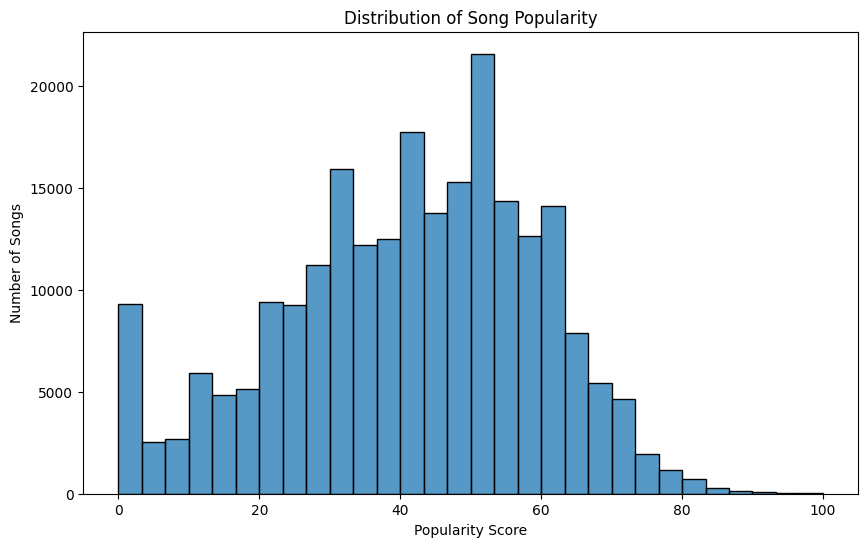

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['popularity'], bins=30, kde=False)
plt.title('Distribution of Song Popularity')
plt.xlabel('Popularity Score')
plt.ylabel('Number of Songs')
plt.show()

<ipython-input-15-cfb5c35fcf0b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


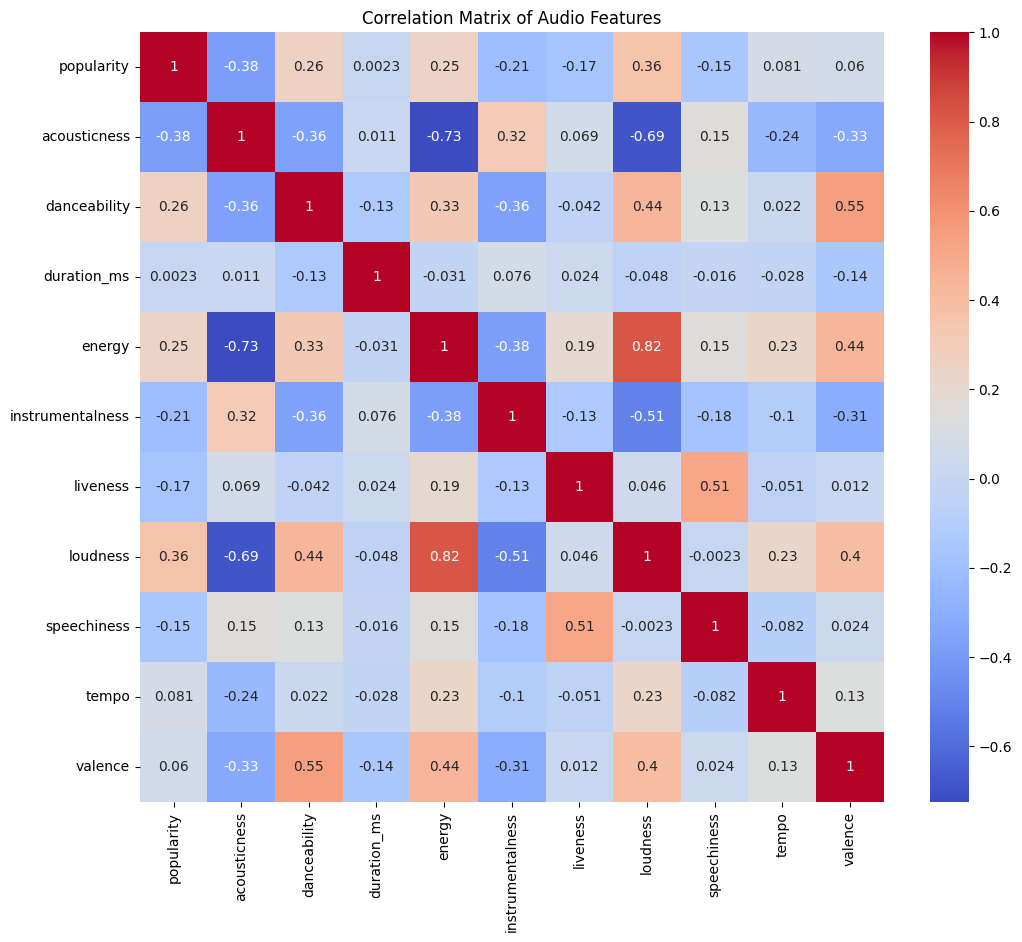

In [15]:
corr = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Audio Features')
plt.show()

**From this heatmap, we can deduce the following:**

    - Popularity has a moderate positive correlation with loudness (0.36) and a moderate negative correlation with acousticness (-0.38).
    - Energy and acousticness are strongly negatively correlated (-0.73), which could mean that songs with higher energy tend to be less acoustic.
    - Loudness and energy also have a strong positive correlation (0.82), suggesting that louder songs are typically more energetic.
    - Other features such as danceability and valence have positive correlations with each other (0.55), which may indicate that more danceable songs are often perceived as more positive or happy.

  - duration_ms has a very low correlation with popularity, it's unlikely to be a strong predictor and could be removed. It might streamline your model without impacting performance.

## Data Preprocessing

Based on our correlation analysis, we will refine our feature list. We are removing `duration_ms` due to its low correlation with `popularity`. Additionally, we'll address the potential multicollinearity between `loudness` and `energy`.


In [28]:
# Remove 'duration_ms' from the feature set
# And choose between 'loudness' and 'energy' if you decide to address multicollinearity
numerical_features = ['acousticness', 'danceability', 'energy',
                      'instrumentalness', 'liveness', 'speechiness',
                      'valence', 'tempo', 'loudness']  # Assuming you chose to keep both for now

# Remove one of the highly correlated features to reduce multicollinearity
numerical_features.remove('energy')  # Remove 'energy', keep 'loudness'

# Now, update your dataset with the selected features
X = df[numerical_features]
y = df['popularity']

### Rescaling Features

To prepare our numerical features for modeling, particularly for the Neural Network, we are applying standard scaling to transform them to a mean of zero and a standard deviation of one.

In [29]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the data and transform it
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model Training and Evaluation - Decision Tree

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)

# Fit the model on the scaled training data
dt_model.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred_dt = dt_model.predict(X_test_scaled)

# Calculate the performance metrics
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_r2 = r2_score(y_test, y_pred_dt)

# Display the metrics
print(f'Decision Tree Mean Squared Error (MSE): {dt_mse:.2f}')
print(f'Decision Tree R^2: {dt_r2:.2f}')


Decision Tree Mean Squared Error (MSE): 280.25
Decision Tree R^2: 0.16


# Model Training and Evaluation - Neural Network

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the Neural Network architecture
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the Neural Network
nn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the Neural Network
history = nn_model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=32)

# Predict on the scaled test data
y_pred_nn = nn_model.predict(X_test_scaled).flatten()

# Calculate the performance metrics
nn_mse = mean_squared_error(y_test, y_pred_nn)
nn_r2 = r2_score(y_test, y_pred_nn)

# Display the metrics
print(f'Neural Network Mean Squared Error (MSE): {nn_mse:.2f}')
print(f'Neural Network R^2: {nn_r2:.2f}')


Epoch 1/100
4655/4655 [==============================] - 12s 2ms/step - loss: 284.5314 - val_loss: 238.1702
Epoch 2/100
4655/4655 [==============================] - 11s 2ms/step - loss: 234.2830 - val_loss: 232.5254
Epoch 3/100
4655/4655 [==============================] - 10s 2ms/step - loss: 231.1190 - val_loss: 233.2307
Epoch 4/100
4655/4655 [==============================] - 13s 3ms/step - loss: 229.8301 - val_loss: 229.8732
Epoch 5/100
4655/4655 [==============================] - 11s 2ms/step - loss: 228.8829 - val_loss: 228.9956
Epoch 6/100
4655/4655 [==============================] - 11s 2ms/step - loss: 228.1902 - val_loss: 229.9705
Epoch 7/100
4655/4655 [==============================] - 12s 3ms/step - loss: 227.5203 - val_loss: 227.9709
Epoch 8/100
4655/4655 [==============================] - 12s 3ms/step - loss: 227.0088 - val_loss: 227.3409
Epoch 9/100
4655/4655 [==============================] - 12s 2ms/step - loss: 226.3998 - val_loss: 226.7733
Epoch 10/100
4655/4655 [====

## Results Interpretation

Comparing the performance of the Decision Tree and Neural Network models will give us an indication of which model better predicts the popularity of songs based on our dataset. We'll consider the MSE and R-squared values in our comparison to understand the strengths and weaknesses of each model.

You can view the results of the analysis in the [Results](Results/Song_Popularity_Prediction_Results.md) file.